***
# Supervised Learning : Exploring Classification Models for Predicting Categorical Responses

***
### Sergio Baz Galicia <br>
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Model Development With Hyperparameter Tuning](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Logistic Regression](#1.6.2)
        * [1.6.3 Decision Trees](#1.6.3)
        * [1.6.4 Random Forest](#1.6.4)
        * [1.6.5 Support Vector Machine](#1.6.5)
    * [1.7 Model Development With Class Weights](#1.7)
        * [1.7.1 Premodelling Data Description](#1.7.1)
        * [1.7.2 Logistic Regression](#1.7.2)
        * [1.7.3 Decision Trees](#1.7.3)
        * [1.7.4 Random Forest](#1.7.4)
        * [1.7.5 Support Vector Machine](#1.7.5)
    * [1.8 Model Development With SMOTE Upsampling](#1.8)
        * [1.8.1 Premodelling Data Description](#1.8.1)
        * [1.8.2 Logistic Regression](#1.8.2)
        * [1.8.3 Decision Trees](#1.8.3)
        * [1.8.4 Random Forest](#1.8.4)
        * [1.8.5 Support Vector Machine](#1.8.5)
    * [1.9 Model Development With CNN Downsampling](#1.9)
        * [1.9.1 Premodelling Data Description](#1.9.1)
        * [1.9.2 Logistic Regression](#1.9.2)
        * [1.9.3 Decision Trees](#1.9.3)
        * [1.9.4 Random Forest](#1.9.4)
        * [1.9.5 Support Vector Machine](#1.9.5)
    * [1.10 Model Development With Stacking Ensemble Learning](#1.10)
        * [1.10.1 Premodelling Data Description](#1.10.1)
        * [1.10.2 Logistic Regression](#1.10.2)
    * [1.11 Consolidated Findings](#1.7) 
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

## Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.ensemble import StackingClassifier

Matplotlib is building the font cache; this may take a moment.


# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements different predictive modelling procedures for dichotomous categorical responses using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. Models applied in the analysis to predict dichotomous categorical responses included the **Logistic Regression**, **Decision Trees**, **Random Forest** and **Support Vector Machine** algorithms. Remedial procedures on addressing class imbalance including **Class Weighting**, **Synthetic Minority Oversampling Technique** and **Condensed Nearest Neighbors** were similarly considered, as applicable. Ensemble learning using **Stacking** which consolidate many different models types on the same data and using another model to learn how to best combine the predictions was also explored. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.


In [14]:
mental_health = pd.read_csv('MentalHealth.csv.csv')

In [25]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [26]:
mental_health.dtypes

id                            int64
age                           int64
gender                       object
region                       object
income_level                 object
education_level              object
daily_role                   object
device_hours_per_day        float64
phone_unlocks                 int64
notifications_per_day         int64
social_media_mins             int64
study_mins                    int64
physical_activity_days      float64
sleep_hours                 float64
sleep_quality               float64
anxiety_score               float64
depression_score            float64
stress_level                float64
happiness_score             float64
focus_score                 float64
high_risk_flag                int64
device_type                  object
productivity_score          float64
digital_dependence_score    float64
dtype: object

In [16]:
mental_health.describe()

,id,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,28.078571,7.317677,147.107429,335.117143,159.362857,108.116571,3.350000,7.254481,2.708848,7.183858,8.830000,5.076560,6.418568,41.598600,0.201429,65.299301,36.684152
std,1010.507298,9.352385,3.239838,67.770656,239.678612,132.748048,79.796273,1.877976,1.291879,1.101105,5.043220,5.738959,3.403503,3.019828,23.764574,0.401125,9.664716,14.115504
min,1.000000,13.000000,0.280000,9.000000,22.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,5.600000
25%,875.750000,21.000000,4.867500,96.000000,170.000000,68.000000,42.000000,2.000000,6.410545,1.919438,4.000000,4.000000,1.341488,4.000000,24.750000,0.000000,59.000000,26.200000
50%,1750.500000,27.000000,6.760000,136.000000,268.000000,119.000000,102.000000,3.000000,7.291580,2.907819,6.000000,8.000000,4.809726,7.500000,44.000000,0.000000,65.299301,35.300000
75%,2625.250000,34.000000,9.152500,187.000000,434.000000,204.000000,163.000000,5.000000,8.162298,3.276968,8.845008,13.000000,8.794302,8.900000,59.000000,0.000000,71.000000,45.100000
max,3500.000000,50.000000,17.160000,374.000000,1211.000000,631.000000,418.000000,7.000000,11.004566,5.000000,27.154217,27.000000,10.000000,10.000000,100.000000,1.000000,95.000000,89.200000


In [27]:
mental_health.head()

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


In [29]:

print("Vista previa del dataset:")
display(mental_health.head())
print("\nTipos de datos originales:")
print(mental_health.dtypes)

# ---- Variables categóricas nominales ----
nominal_cols = ['gender', 'region', 'daily_role', 'device_type']
for col in nominal_cols:
    mental_health[col] = mental_health[col].astype('category')

# ---- Variables categóricas ordinales ----
mental_health['income_level'] = mental_health['income_level'].astype('category')
mental_health['income_level'] = mental_health['income_level'].cat.set_categories(
    ['Low', 'Medium', 'High'], ordered=True
)

mental_health['education_level'] = mental_health['education_level'].astype('category')
mental_health['education_level'] = mental_health['education_level'].cat.set_categories(
    ['Primary', 'Secondary', 'Tertiary', 'Postgraduate'], ordered=True
)

# ---- Variable objetivo ----
mental_health['high_risk_flag'] = mental_health['high_risk_flag'].astype('category')

print("\n Nuevos tipos de datos:")
print(mental_health.dtypes)

print("\nResumen de variables categóricas:")
display(mental_health.describe(include='category').transpose())

print("\nResumen de variables numéricas:")
display(mental_health.describe(include='number').transpose())


Vista previa del dataset:


,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,NaN,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,NaN,NaN,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,NaN,NaN,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,NaN,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,NaN,NaN,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000



Tipos de datos originales:
id                             int64
age                            int64
gender                      category
region                      category
income_level                category
education_level             category
daily_role                  category
device_hours_per_day         float64
phone_unlocks                  int64
notifications_per_day          int64
social_media_mins              int64
study_mins                     int64
physical_activity_days       float64
sleep_hours                  float64
sleep_quality                float64
anxiety_score                float64
depression_score             float64
stress_level                 float64
happiness_score              float64
focus_score                  float64
high_risk_flag              category
device_type                 category
productivity_score           float64
digital_dependence_score     float64
dtype: object

 Nuevos tipos de datos:
id                             int64
age     

,count,unique,top,freq
gender,3500,2,Female,1835
region,3500,6,Europe,797
income_level,1614,2,Low,1139
education_level,0,0,NaN,NaN
daily_role,3500,5,Full-time Employee,1429
high_risk_flag,3500,2,0,2795
device_type,3500,4,Android,903



Resumen de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
id,3500.0,1750.500000,1010.507298,1.00,875.750000,1750.500000,2625.250000,3500.000000
age,3500.0,28.078571,9.352385,13.00,21.000000,27.000000,34.000000,50.000000
device_hours_per_day,3500.0,7.317677,3.239838,0.28,4.867500,6.760000,9.152500,17.160000
phone_unlocks,3500.0,147.107429,67.770656,9.00,96.000000,136.000000,187.000000,374.000000
notifications_per_day,3500.0,335.117143,239.678612,22.00,170.000000,268.000000,434.000000,1211.000000
social_media_mins,3500.0,159.362857,132.748048,0.00,68.000000,119.000000,204.000000,631.000000
study_mins,3500.0,108.116571,79.796273,0.00,42.000000,102.000000,163.000000,418.000000
physical_activity_days,3500.0,3.350000,1.877976,0.00,2.000000,3.000000,5.000000,7.000000
sleep_hours,3500.0,7.254481,1.291879,3.00,6.410545,7.291580,8.162298,11.004566
sleep_quality,3500.0,2.708848,1.101105,1.00,1.919438,2.907819,3.276968,5.000000


# 1.3 Data Quality Assessment

In [33]:

# ==============================
# BASIC INFORMATION
# ==============================
print("Dataset shape (rows, columns):")
print(mental_health.shape)
print("\nDuplicate rows:", mental_health.duplicated().sum())

# ==============================
# COLUMN-LEVEL DATA QUALITY
# ==============================
variable_name_list = list(mental_health.columns)
data_type_list = list(mental_health.dtypes)
row_count_list = [len(mental_health)] * len(mental_health.columns)
non_null_count_list = list(mental_health.count())
null_count_list = list(mental_health.isnull().sum())
fill_rate_list = [non_null_count_list[i] / row_count_list[i] for i in range(len(variable_name_list))]

all_column_quality_summary = pd.DataFrame({
    'Column.Name': variable_name_list,
    'Column.Type': data_type_list,
    'Row.Count': row_count_list,
    'Non.Null.Count': non_null_count_list,
    'Null.Count': null_count_list,
    'Fill.Rate': fill_rate_list
})

print("\n📋 Column Quality Summary:")
display(all_column_quality_summary)

# Show columns with missing data
print("\n Columns with missing data:")
display(all_column_quality_summary[all_column_quality_summary['Fill.Rate'] < 1].sort_values(by='Fill.Rate'))


# ==============================
# NUMERIC VARIABLE ASSESSMENT
# ==============================
numeric_cols = mental_health.select_dtypes(include=['float64', 'int64']).columns

# Variance and skewness
variance = mental_health[numeric_cols].var()
skewness = mental_health[numeric_cols].skew()

quality_stats = pd.DataFrame({
    'Variance': variance,
    'Skewness': skewness,
    'Unique.Count': [mental_health[col].nunique() for col in numeric_cols],
    'First.Second.Mode.Ratio': [
        np.nan if len(mental_health[col].mode()) < 2 
        else (
            mental_health[col].mode()[0] / mental_health[col].mode()[1]
            if mental_health[col].mode()[1] != 0 else np.nan
        )
        for col in numeric_cols
    ]
})

print("\n Numeric Variable Variability and Skewness:")
display(quality_stats.sort_values(by='Skewness', ascending=False))


# ==============================
# ROW-LEVEL DATA QUALITY
# ==============================
mental_health['Missing.Count'] = mental_health.isnull().sum(axis=1)
mental_health['Missing.Rate'] = mental_health['Missing.Count'] / len(mental_health.columns)

print("\n Rows with high missing rate (>20%):")
display(mental_health[mental_health['Missing.Rate'] > 0.2][['Missing.Count', 'Missing.Rate']].head(10))


Dataset shape (rows, columns):
(3500, 26)

Duplicate rows: 0

📋 Column Quality Summary:


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,id,int64,3500,3500,0,1.000000
1,age,int64,3500,3500,0,1.000000
2,gender,category,3500,3500,0,1.000000
3,region,category,3500,3500,0,1.000000
4,income_level,category,3500,1614,1886,0.461143
5,education_level,category,3500,0,3500,0.000000
6,daily_role,category,3500,3500,0,1.000000
7,device_hours_per_day,float64,3500,3500,0,1.000000
8,phone_unlocks,int64,3500,3500,0,1.000000
9,notifications_per_day,int64,3500,3500,0,1.000000



 Columns with missing data:


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
5,education_level,category,3500,0,3500,0.000000
4,income_level,category,3500,1614,1886,0.461143



 Numeric Variable Variability and Skewness:


,Variance,Skewness,Unique.Count,First.Second.Mode.Ratio
notifications_per_day,5.744584e+04,1.633823,802,NaN
social_media_mins,1.762204e+04,1.605496,530,0.67033
anxiety_score,2.543407e+01,1.557457,1793,NaN
device_hours_per_day,1.049655e+01,0.716482,1174,NaN
phone_unlocks,4.592862e+03,0.660067,324,NaN
digital_dependence_score,1.992475e+02,0.640036,633,NaN
study_mins,6.367445e+03,0.492516,330,NaN
depression_score,3.293565e+01,0.477967,28,NaN
age,8.746710e+01,0.477834,38,NaN
stress_level,1.158383e+01,0.214742,2467,NaN



 Rows with high missing rate (>20%):


,Missing.Count,Missing.Rate


# 1.4 Data Preprocessing

### 1.4.1 Data Cleaning

In [34]:
# 1.4.1 Data Cleaning

# Check for duplicates
duplicates = mental_health.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
mental_health = mental_health.drop_duplicates()

# Check for invalid or inconsistent values
print(mental_health.describe(include='all'))


Number of duplicate rows: 0
                 id          age  gender  region income_level education_level  \
count   3500.000000  3500.000000    3500    3500         1614               0   
unique          NaN          NaN       2       6            2               0   
top             NaN          NaN  Female  Europe          Low             NaN   
freq            NaN          NaN    1835     797         1139             NaN   
mean    1750.500000    28.078571     NaN     NaN          NaN             NaN   
std     1010.507298     9.352385     NaN     NaN          NaN             NaN   
min        1.000000    13.000000     NaN     NaN          NaN             NaN   
25%      875.750000    21.000000     NaN     NaN          NaN             NaN   
50%     1750.500000    27.000000     NaN     NaN          NaN             NaN   
75%     2625.250000    34.000000     NaN     NaN          NaN             NaN   
max     3500.000000    50.000000     NaN     NaN          NaN             NaN   


### 1.4.2 Missing Data Imputation

In [35]:
# 1.4.2 Missing Data Imputation

# Check missing values
missing = mental_health.isnull().sum()
print("Missing values per column:\n", missing)

# Split numeric and categorical columns
numeric_cols = mental_health.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = mental_health.select_dtypes(include=['object']).columns

# Impute numeric columns with median
mental_health[numeric_cols] = mental_health[numeric_cols].fillna(mental_health[numeric_cols].median())

# Impute categorical columns with mode
for col in categorical_cols:
    mental_health[col] = mental_health[col].fillna(mental_health[col].mode()[0])

print("Missing values after imputation:\n", mental_health.isnull().sum())


Missing values per column:
 id                             0
age                            0
gender                         0
region                         0
income_level                1886
education_level             3500
daily_role                     0
device_hours_per_day           0
phone_unlocks                  0
notifications_per_day          0
social_media_mins              0
study_mins                     0
physical_activity_days         0
sleep_hours                    0
sleep_quality                  0
anxiety_score                  0
depression_score               0
stress_level                   0
happiness_score                0
focus_score                    0
high_risk_flag                 0
device_type                    0
productivity_score             0
digital_dependence_score       0
Missing.Count                  0
Missing.Rate                   0
dtype: int64
Missing values after imputation:
 id                             0
age                            0
g

### 1.4.3 Outlier Treatment 

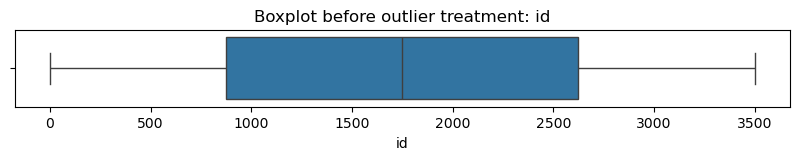

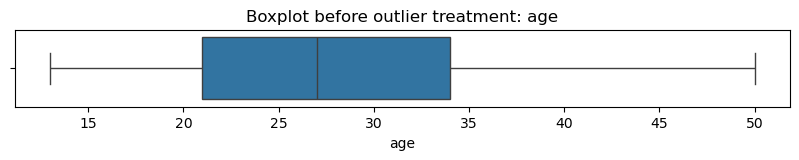

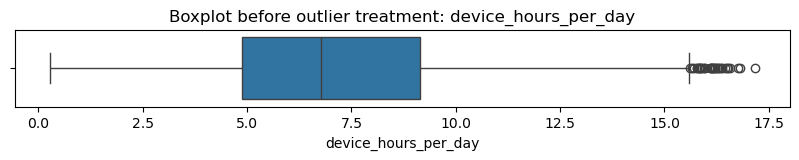

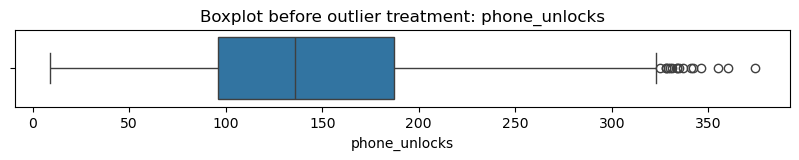

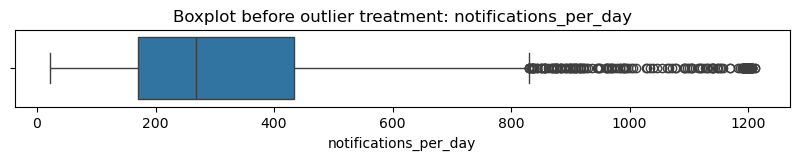

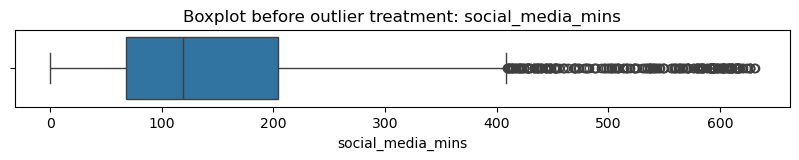

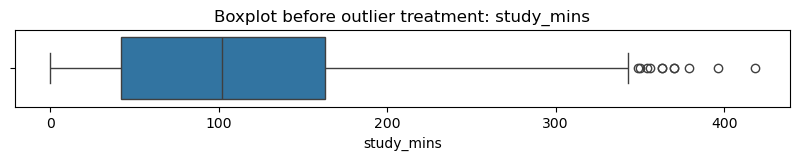

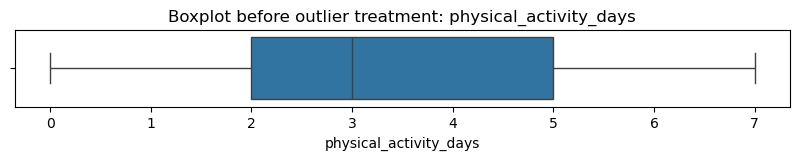

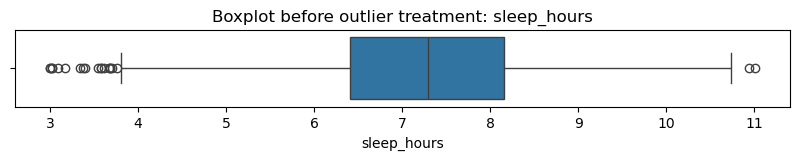

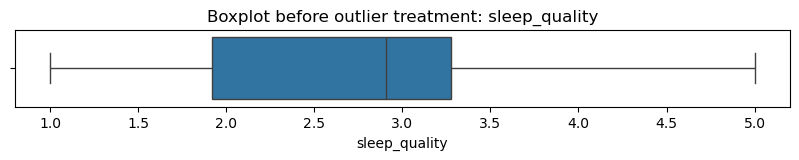

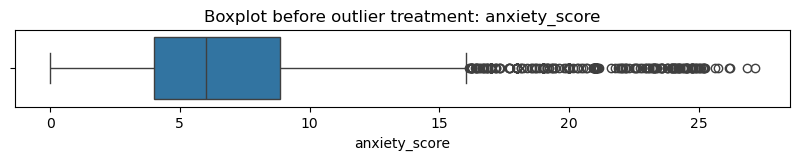

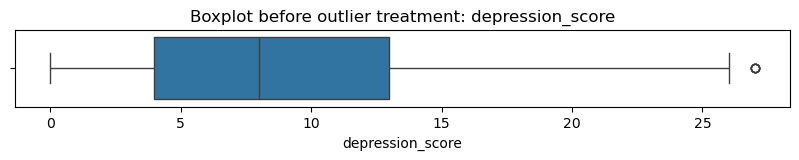

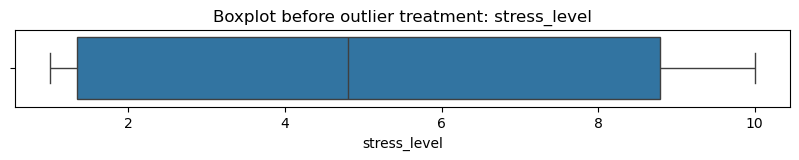

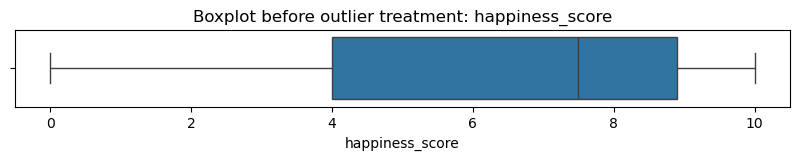

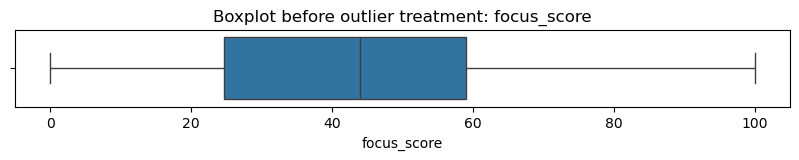

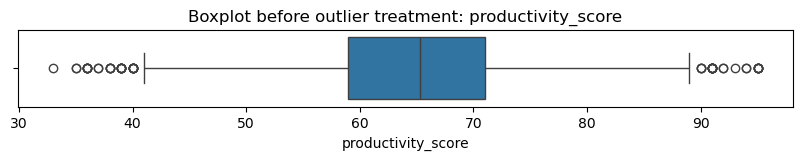

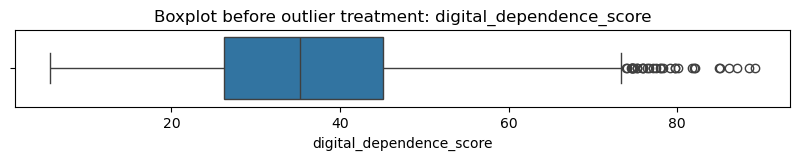

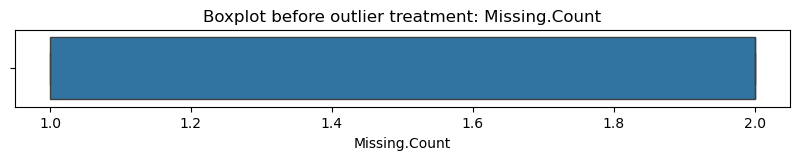

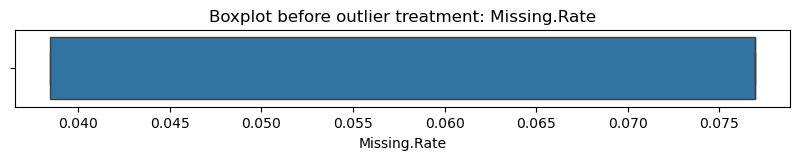

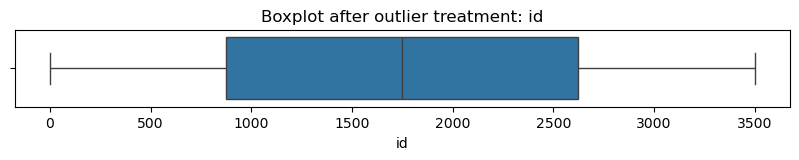

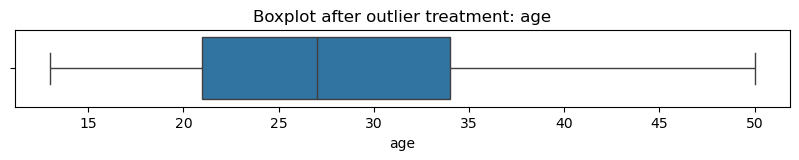

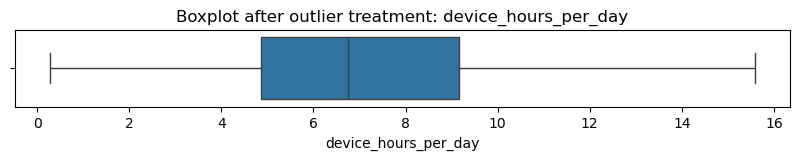

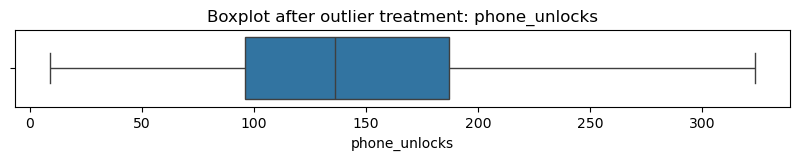

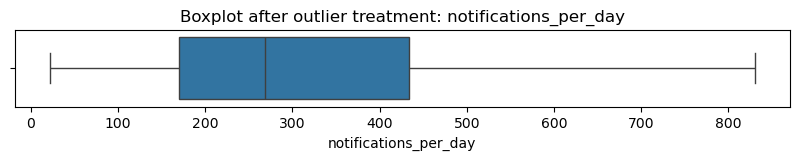

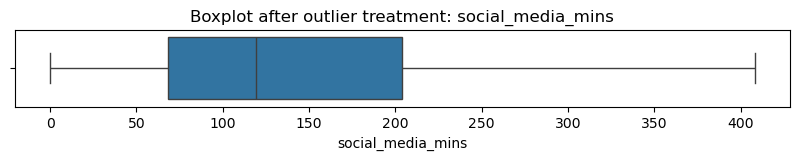

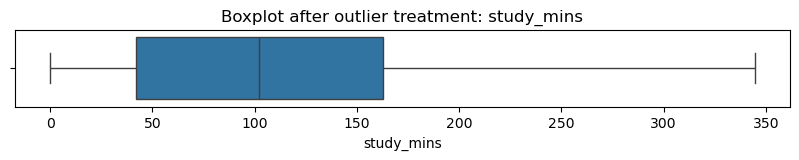

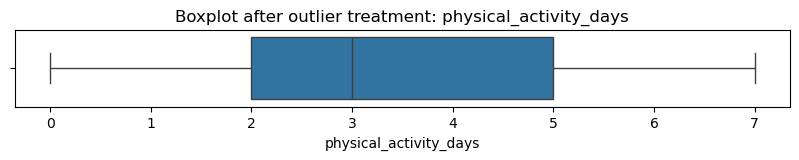

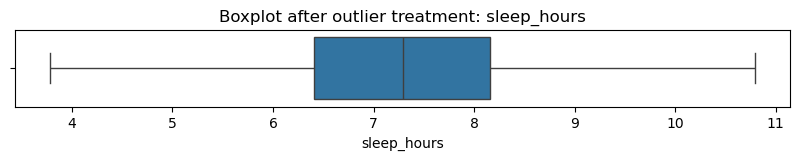

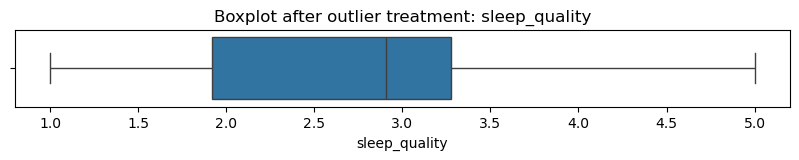

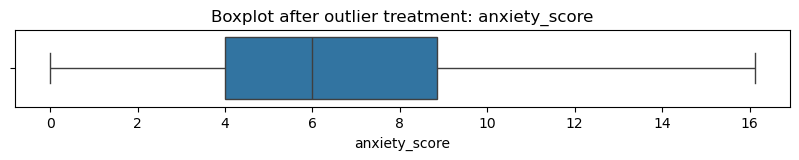

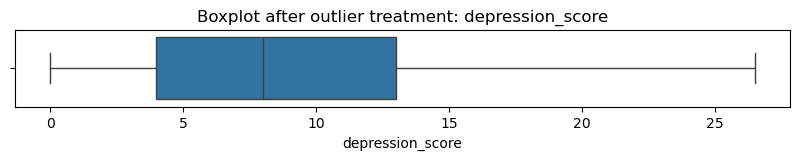

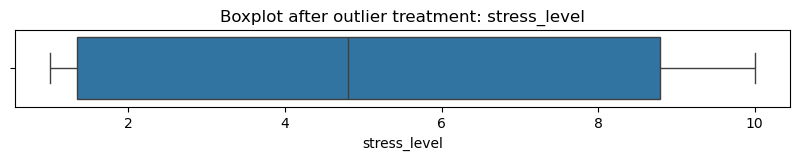

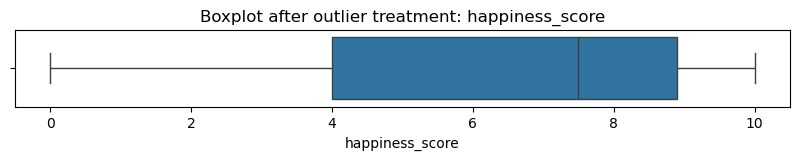

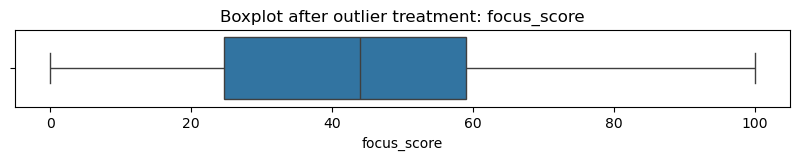

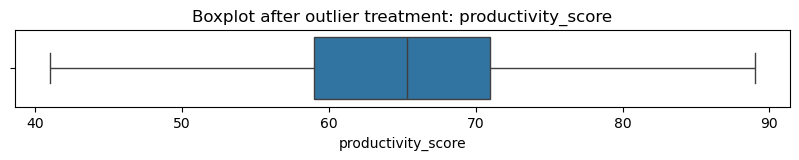

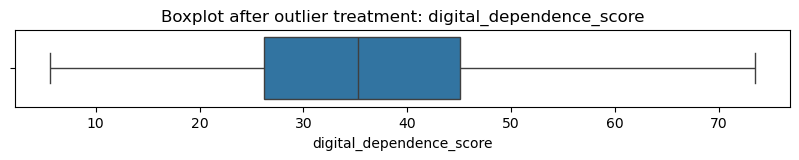

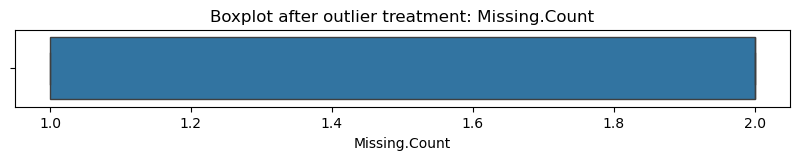

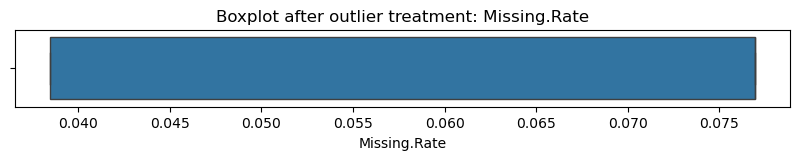

In [38]:
# 1.4.3 Outlier Treatment

import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = mental_health.select_dtypes(include=['int64', 'float64']).columns
numeric_data = mental_health[numeric_cols]

# Visualize outliers before treatment
for column in numeric_cols:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=numeric_data, x=column)
    plt.title(f'Boxplot before outlier treatment: {column}')
    plt.show()

# Compute IQR (Interquartile Range)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Clip outliers using IQR limits (per column)
mental_health[numeric_cols] = numeric_data.clip(
    lower=Q1 - 1.5 * IQR,
    upper=Q3 + 1.5 * IQR,
    axis=1
)

# Visualize outliers after treatment
for column in numeric_cols:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=mental_health[numeric_cols], x=column)
    plt.title(f'Boxplot after outlier treatment: {column}')
    plt.show()


### 1.4.4 Collinearity 

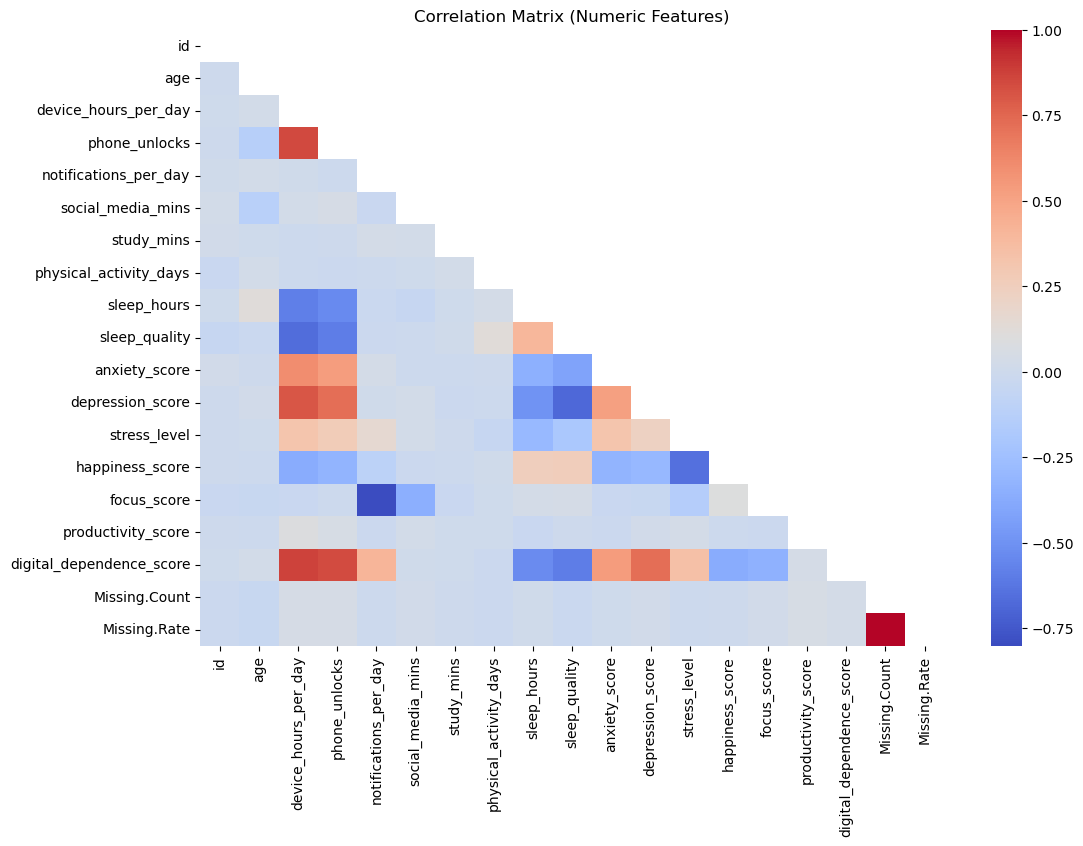

In [39]:
# 1.4.4 Collinearity

import numpy as np
from scipy import stats

corr_matrix = mental_health[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Correlation significance function
def correlation_significance(df):
    p_matrix = np.zeros(shape=(df.shape[1], df.shape[1]))
    for col in df.columns:
        for col2 in df.columns:
            if col != col2:
                _, p = stats.pearsonr(df[col], df[col2])
                p_matrix[df.columns.get_loc(col), df.columns.get_loc(col2)] = p
    return p_matrix

p_values = correlation_significance(mental_health[numeric_cols])


### 1.4.5 Shape Tranformation

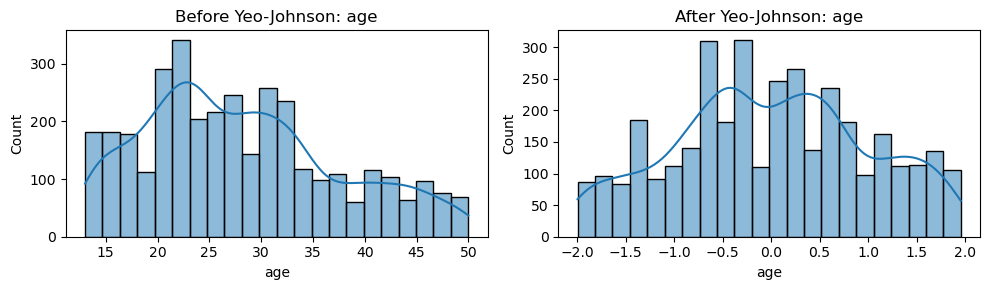

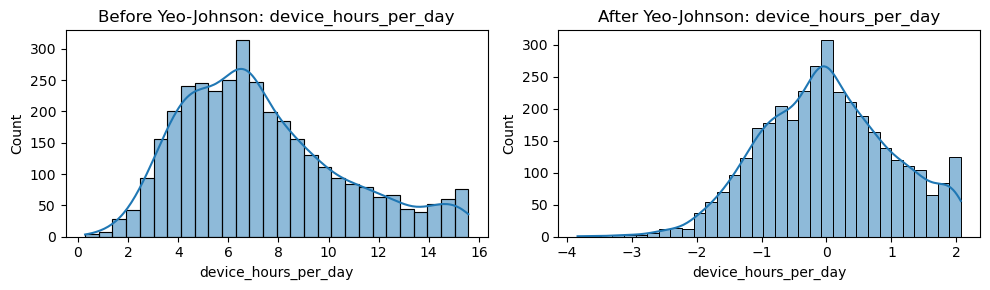

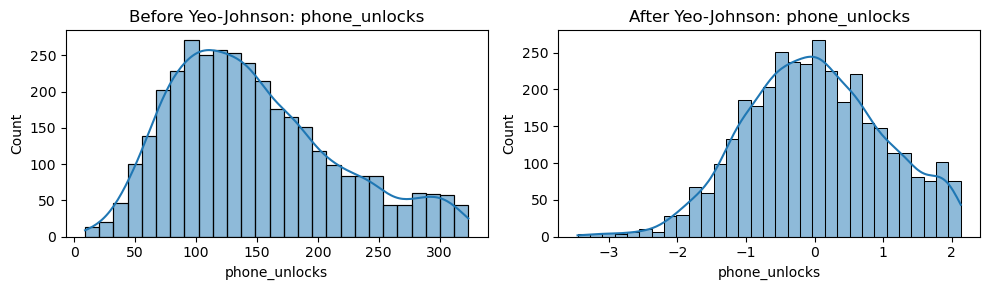

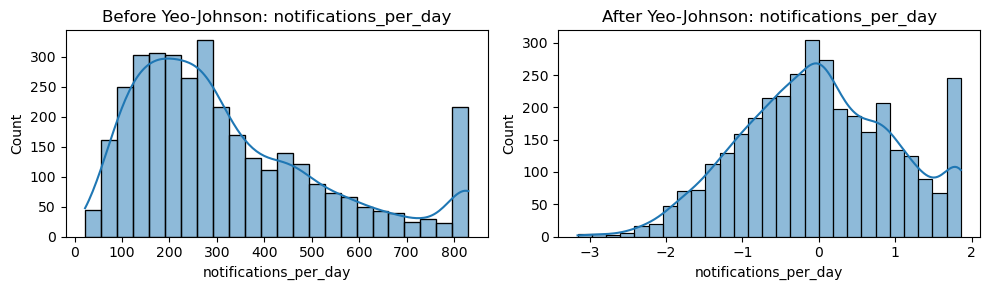

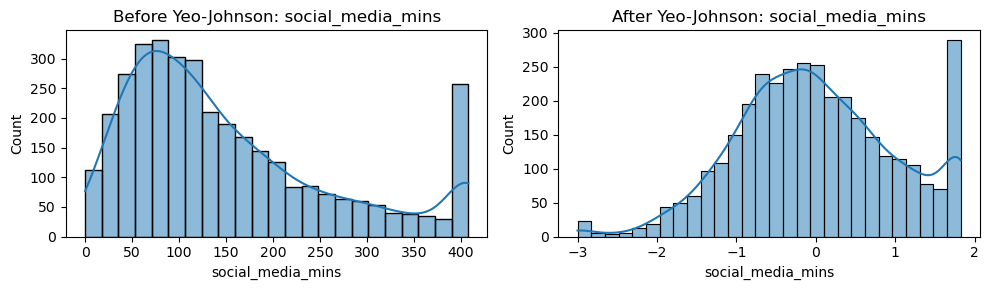

In [40]:
# 1.4.5 Shape Transformation (Yeo-Johnson Transformation)

from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns again (excluding ID if necessary)
numeric_cols = mental_health.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'id']  # optional

# Initialize the transformer
yeojohnson = PowerTransformer(method='yeo-johnson')

# Fit and transform
mental_health_transformed = mental_health.copy()
mental_health_transformed[numeric_cols] = yeojohnson.fit_transform(mental_health[numeric_cols])

# Compare distributions before and after transformation (for a few columns)
for col in numeric_cols[:5]:  # visualize only first 5 numeric columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(mental_health[col], ax=axes[0], kde=True)
    axes[0].set_title(f'Before Yeo-Johnson: {col}')
    sns.histplot(mental_health_transformed[col], ax=axes[1], kde=True)
    axes[1].set_title(f'After Yeo-Johnson: {col}')
    plt.tight_layout()
    plt.show()


### 1.4.6 Centering and Scaling

In [43]:
# 1.4.6 Centering and Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mental_health_scaled = mental_health.copy()
mental_health_scaled[numeric_cols] = scaler.fit_transform(mental_health_scaled[numeric_cols])

print("Scaled data preview:")
mental_health_scaled[numeric_cols].head()


Scaled data preview:


,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,productivity_score,digital_dependence_score,Missing.Count,Missing.Rate
0,1.274876,-1.169712,-1.510328,1.155915,-0.481728,-0.930954,1.943860,1.452519,0.585659,0.760285,-0.667599,0.445701,0.523758,-0.782731,0.492712,-0.782973,-1.080984,-1.080984
1,-0.115342,-0.515447,-0.696216,0.338333,0.205116,-0.075910,-0.718962,1.229847,0.181025,-0.692440,-0.841939,-0.279057,0.556877,-0.277705,-0.136724,-0.467873,0.925083,0.925083
2,0.312417,0.483006,0.502749,-0.450050,2.319870,0.401908,-1.251526,-0.598593,0.163828,-0.692440,-0.144578,-1.071820,0.391281,-1.119414,-0.000420,0.284069,0.925083,0.925083
3,1.381816,-1.011572,-0.785028,-0.269987,-1.204720,0.162999,0.346167,0.267694,0.353005,0.065796,0.029762,-0.023817,0.457519,-0.572303,1.541771,0.003641,-1.080984,-1.080984
4,-0.222282,1.785335,0.769186,-1.131368,-0.038894,-0.604026,-1.251526,-1.601012,0.070168,0.049806,1.075804,1.284800,-0.734772,1.195286,-0.000420,0.842654,0.925083,0.925083


### 1.4.7 Data Encoding 

In [44]:
# 1.4.7 Data Encoding

from sklearn.preprocessing import LabelEncoder

mental_health_encoded = mental_health_scaled.copy()

label_enc = LabelEncoder()
for col in categorical_cols:
    mental_health_encoded[col] = label_enc.fit_transform(mental_health_encoded[col])

print("Encoded data preview:")
mental_health_encoded.head()


Encoded data preview:


,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score,Missing.Count,Missing.Rate
0,1,1.274876,Female,Asia,High,NaN,Part-time/Shift,-1.169712,-1.510328,1.155915,...,-0.667599,0.445701,0.523758,-0.782731,0,Android,0.492712,-0.782973,-1.080984,-1.080984
1,2,-0.115342,Male,Africa,NaN,NaN,Full-time Employee,-0.515447,-0.696216,0.338333,...,-0.841939,-0.279057,0.556877,-0.277705,0,Laptop,-0.136724,-0.467873,0.925083,0.925083
2,3,0.312417,Male,North America,NaN,NaN,Full-time Employee,0.483006,0.502749,-0.450050,...,-0.144578,-1.071820,0.391281,-1.119414,0,Android,-0.000420,0.284069,0.925083,0.925083
3,4,1.381816,Female,Middle East,Low,NaN,Caregiver/Home,-1.011572,-0.785028,-0.269987,...,0.029762,-0.023817,0.457519,-0.572303,1,Tablet,1.541771,0.003641,-1.080984,-1.080984
4,5,-0.222282,Female,Europe,NaN,NaN,Full-time Employee,1.785335,0.769186,-1.131368,...,1.075804,1.284800,-0.734772,1.195286,1,Android,-0.000420,0.842654,0.925083,0.925083


### 1.4.8 Preprocessed Data Description

In [45]:
# 1.4.8 Preprocessed Data Description

print("Final dataset shape:", mental_health_encoded.shape)
print("\nData types:\n", mental_health_encoded.dtypes)
print("\nSummary statistics:\n", mental_health_encoded.describe())


Final dataset shape: (3500, 26)

Data types:
 id                             int64
age                          float64
gender                      category
region                      category
income_level                category
education_level             category
daily_role                  category
device_hours_per_day         float64
phone_unlocks                float64
notifications_per_day        float64
social_media_mins            float64
study_mins                   float64
physical_activity_days       float64
sleep_hours                  float64
sleep_quality                float64
anxiety_score                float64
depression_score             float64
stress_level                 float64
happiness_score              float64
focus_score                  float64
high_risk_flag              category
device_type                 category
productivity_score           float64
digital_dependence_score     float64
Missing.Count                float64
Missing.Rate                 

# 1.5 Data Exploration

Numerous studies suggest that excessive screen time and digital dependence may contribute to poorer mental health outcomes, including higher depression and anxiety levels, sleep problems, and reduced focus or happiness.
This study aims to empirically test these relationships using the dataset on digital lifestyle behaviors and self-reported mental health indicators.

## Hypothesis Testing

#### Hypothesis 1 — Gender Differences in Depression

H₀ (Null Hypothesis): There is no significant difference in depression scores between males and females.

H₁ (Alternative Hypothesis): There is a significant difference in depression scores between males and females.

Statistical Test: Independent samples t-test

C:\Users\HP\AppData\Local\Temp\ipykernel_38532\3670459552.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='depression_score', data=df_gender, palette='coolwarm')


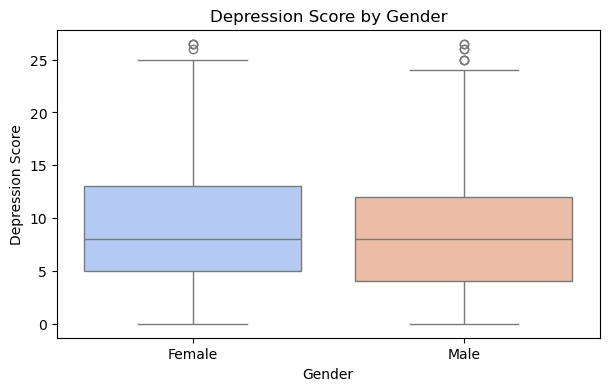

T-statistic: -0.937, p-value: 0.34906
 Fail to Reject H₀: No significant difference found between genders.


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Drop missing values
df_gender = mental_health[['gender', 'depression_score']].dropna()

# Boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x='gender', y='depression_score', data=df_gender, palette='coolwarm')
plt.title("Depression Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Depression Score")
plt.show()

# Separate groups
male = df_gender.loc[df_gender['gender'].str.lower() == 'male', 'depression_score']
female = df_gender.loc[df_gender['gender'].str.lower() == 'female', 'depression_score']

# Independent t-test
t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")

if p_val < 0.05:
    print(" Reject H₀: There is a significant difference in depression scores between genders.")
else:
    print(" Fail to Reject H₀: No significant difference found between genders.")


#### Hypothesis 2 — Relationship Between Phone Use and Depression

H₀: There is no correlation between phone unlocks per day and depression score.

H₁: There is a significant positive correlation between phone unlocks per day and depression score.

Statistical Test: Pearson’s correlation


Correlation between Phone Unlocks and Depression Score
r = 0.724, p = 0.00000
 Significant correlation.


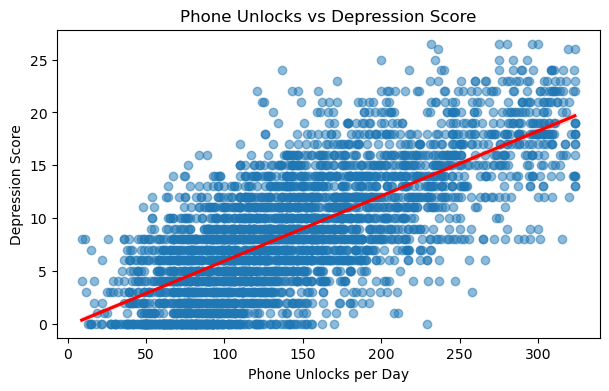

Pearson correlation: 0.724, p-value: 0.00000
 Reject H₀: There is a significant relationship between phone unlocks and depression score.


In [77]:
# H2: Are phone unlocks correlated with depression score?
corr, p_val = stats.pearsonr(mental_health['phone_unlocks'], mental_health['depression_score'])

print("Correlation between Phone Unlocks and Depression Score")
print(f"r = {corr:.3f}, p = {p_val:.5f}")

if p_val < 0.05:
    print(" Significant correlation.")
else:
    print(" No significant correlation.")

# Drop missing data
df_phone = mental_health[['phone_unlocks', 'depression_score']].dropna()

# Scatter plot with regression line
plt.figure(figsize=(7, 4))
sns.regplot(x='phone_unlocks', y='depression_score', data=df_phone, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Phone Unlocks vs Depression Score")
plt.xlabel("Phone Unlocks per Day")
plt.ylabel("Depression Score")
plt.show()

# Correlation test
corr, p_val = stats.pearsonr(df_phone['phone_unlocks'], df_phone['depression_score'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_val:.5f}")

if p_val < 0.05:
    print(" Reject H₀: There is a significant relationship between phone unlocks and depression score.")
else:
    print(" Fail to Reject H₀: No significant relationship found.")


#### Hypothesis 3 — Income Level and Mental Health

H₀: Mean depression scores do not differ across income levels.

H₁: Mean depression scores differ significantly between income levels.

Statistical Test: One-way ANOVA

C:\Users\HP\AppData\Local\Temp\ipykernel_38532\1631888039.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_level', y='happiness_score', data=df_income, palette='viridis')


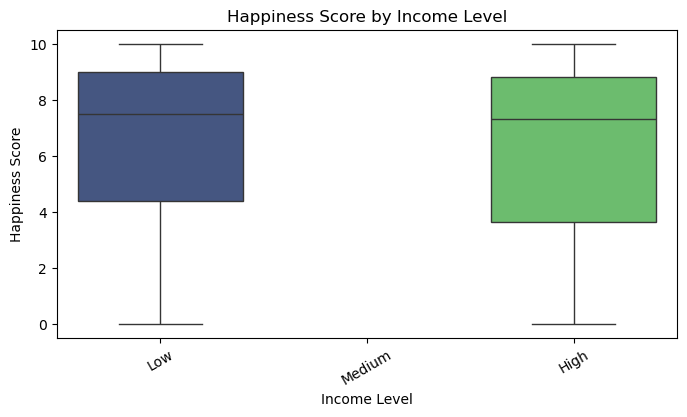

F-statistic: nan, p-value: nan
 Fail to Reject H₀: No significant difference between income levels.


C:\Users\HP\AppData\Local\Temp\ipykernel_38532\1631888039.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_groups = [group['happiness_score'].values for name, group in df_income.groupby('income_level')]
C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [79]:
# H3: Does income level affect depression?
# Drop missing data
df_income = mental_health[['income_level', 'happiness_score']].dropna()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='income_level', y='happiness_score', data=df_income, palette='viridis')
plt.title("Happiness Score by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Happiness Score")
plt.xticks(rotation=30)
plt.show()

# ANOVA test (comparing means between multiple income groups)
income_groups = [group['happiness_score'].values for name, group in df_income.groupby('income_level')]
f_stat, p_val = stats.f_oneway(*income_groups)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

if p_val < 0.05:
    print(" Reject H₀: Mental health significantly differs across income levels.")
else:
    print(" Fail to Reject H₀: No significant difference between income levels.")



# 1.6 Model Development With Hyperparameter Tuning

### 1.6.1 Premodelling Data Description

In [80]:
mental_health_premodelling = mental_health.copy()

In [81]:
cols_to_drop = [] 
mental_health_premodelling = mental_health_premodelling.drop(columns=cols_to_drop, errors='ignore')

print("Premodelling dataset shape:", mental_health_premodelling.shape)
print("\nColumns and dtypes:")
print(mental_health_premodelling.dtypes)

Premodelling dataset shape: (3500, 26)

Columns and dtypes:
id                             int64
age                            int64
gender                      category
region                      category
income_level                category
education_level             category
daily_role                  category
device_hours_per_day         float64
phone_unlocks                float64
notifications_per_day          int64
social_media_mins              int64
study_mins                   float64
physical_activity_days       float64
sleep_hours                  float64
sleep_quality                float64
anxiety_score                float64
depression_score             float64
stress_level                 float64
happiness_score              float64
focus_score                  float64
high_risk_flag              category
device_type                 category
productivity_score           float64
digital_dependence_score     float64
Missing.Count                  int64
Missing.Rate   

In [88]:
mental_health_premodelling = mental_health.copy()

# Convertir el flag binario a texto para que seaborn lo use como categoría
mental_health_premodelling['risk_level'] = mental_health_premodelling['high_risk_flag'].map({0: 'Low', 1: 'High'})


In [107]:
mental_health_premodelling['risk_level'].unique()


['Low', 'High']
Categories (2, object): ['Low', 'High']

In [108]:
# Ensure it's a proper DataFrame (not a view)
mental_health_premodelling = mental_health_premodelling.copy()

# Convert categorical target to numeric
mental_health_premodelling['risk_level_num'] = mental_health_premodelling['risk_level'].map({'Low': 0, 'High': 1})

# Confirm it was added
print(mental_health_premodelling.columns[-5:])  # show last few columns
print(mental_health_premodelling['risk_level_num'].unique())


Index(['digital_dependence_score', 'Missing.Count', 'Missing.Rate',
       'risk_level', 'risk_level_num'],
      dtype='object')
[0, 1]
Categories (2, int64): [0, 1]


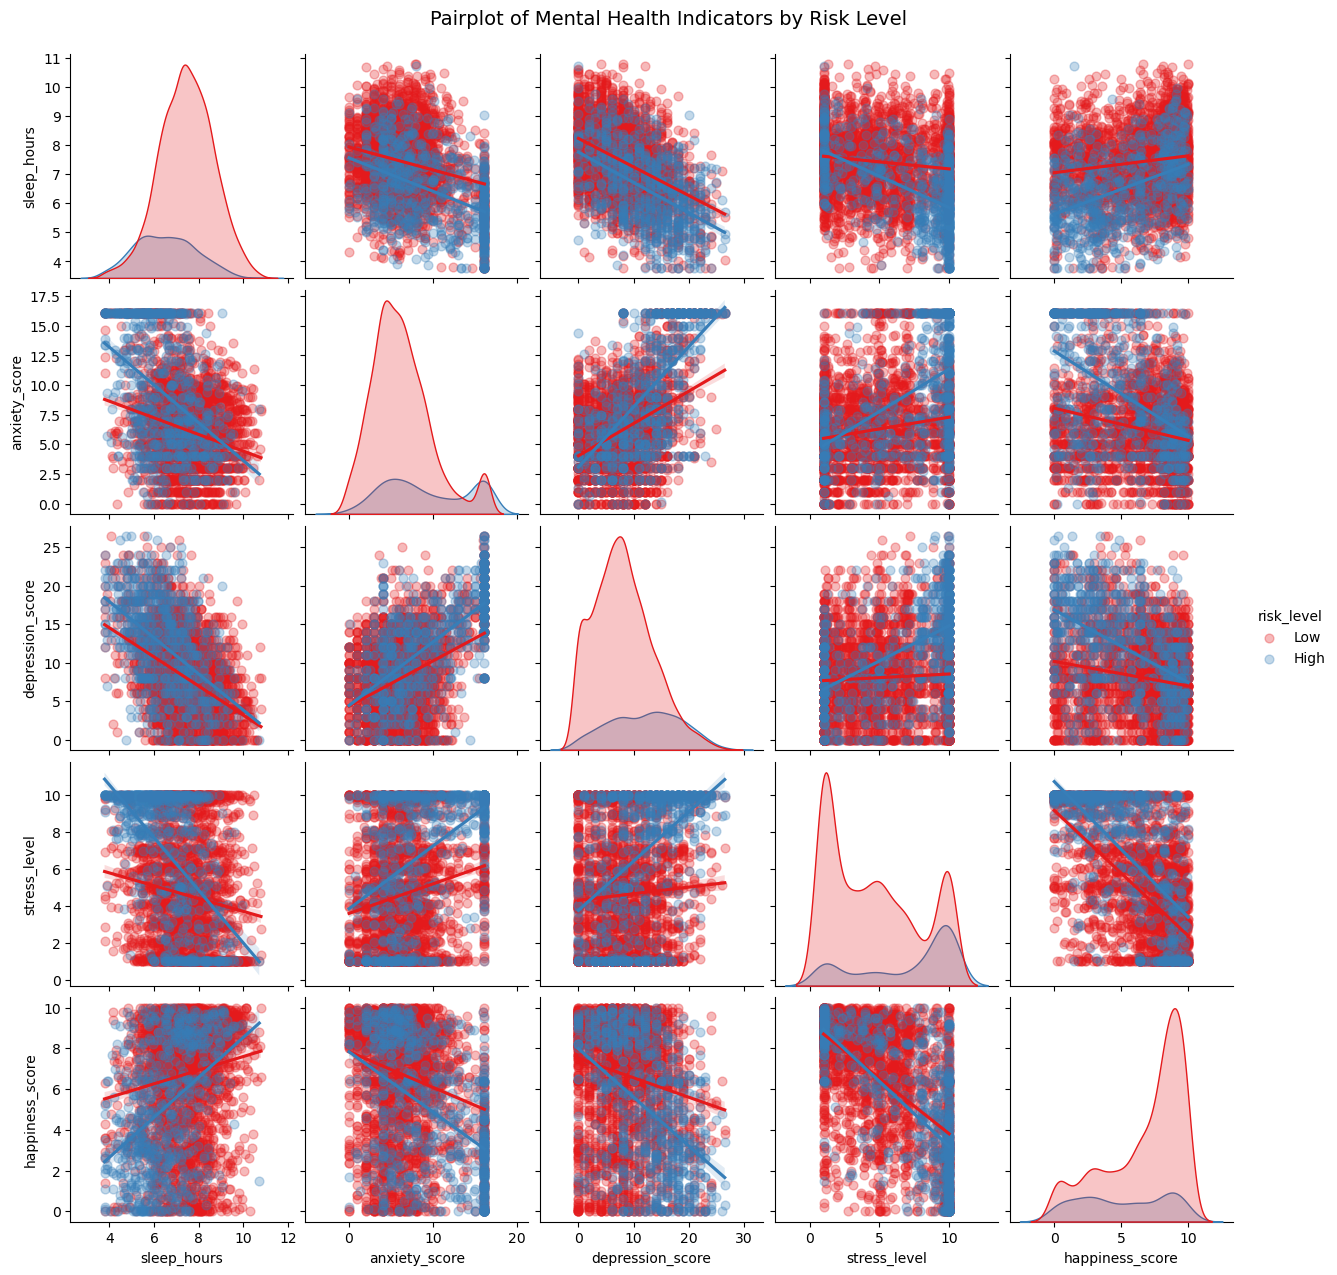

In [117]:

selected_columns = [
    'sleep_hours', 
    'anxiety_score', 
    'depression_score', 
    'stress_level', 
    'happiness_score', 
    'risk_level'
]

sns.pairplot(
    mental_health_premodelling[selected_columns],
    hue='risk_level',
    kind='reg',
    diag_kind='kde',
    palette='Set1',
    plot_kws={'scatter_kws': {'s': 40, 'alpha': 0.3}} 
)

plt.suptitle("Pairplot of Mental Health Indicators by Risk Level", y=1.02, fontsize=14)
plt.show()


In [111]:
target_col = 'high_risk_flag'  # modify according to your project
X = mental_health_premodelling.drop(columns=[target_col])
y = mental_health_premodelling[target_col]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [113]:
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

# 1.6.2 Logistic Regression

In [121]:
# Revisar cuántos NaN hay
y_train.isna().sum()


0

In [122]:
# Supongamos que tu target es 'risk_level'
y_train_num = y_train.map({'Low': 0, 'High': 1})

# Revisar si hay NaN después de map
print(y_train_num.isna().sum())


2450


In [124]:
# Filtrar solo 'Low' y 'High'
mask = y_train.isin(['Low', 'High'])
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask].map({'Low':0, 'High':1})


In [125]:
y_train_filtered.isna().sum()

0

In [127]:
# Revisar tipos de columnas
print(X_train_filtered.dtypes)

# Revisar NaN en X
print(X_train_filtered.isna().sum())


id                             int64
age                            int64
gender                      category
region                      category
income_level                category
education_level             category
daily_role                  category
device_hours_per_day         float64
phone_unlocks                float64
notifications_per_day          int64
social_media_mins              int64
study_mins                   float64
physical_activity_days       float64
sleep_hours                  float64
sleep_quality                float64
anxiety_score                float64
depression_score             float64
stress_level                 float64
happiness_score              float64
focus_score                  float64
device_type                 category
productivity_score           float64
digital_dependence_score     float64
Missing.Count                  int64
Missing.Rate                 float64
risk_level                  category
risk_level_num              category
d

In [128]:
# Convertir columnas categóricas a dummies
X_train_ready = pd.get_dummies(X_train_filtered, drop_first=True)


In [133]:
df = pd.read_csv('MentalHealth.csv.csv')
print(df.columns.tolist())  # asegurarte de que tiene todas las columnas



['id', 'age', 'gender', 'region', 'income_level', 'education_level', 'daily_role', 'device_hours_per_day', 'phone_unlocks', 'notifications_per_day', 'social_media_mins', 'study_mins', 'physical_activity_days', 'sleep_hours', 'sleep_quality', 'anxiety_score', 'depression_score', 'stress_level', 'happiness_score', 'focus_score', 'high_risk_flag', 'device_type', 'productivity_score', 'digital_dependence_score']


In [135]:
X = df.drop(columns=['high_risk_flag','id'])
y = df['high_risk_flag']  # 0/1, listo para Logistic Regression



In [136]:
X_ready = pd.get_dummies(X, drop_first=True).fillna(0)


In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y, test_size=0.2, random_state=88888888
)


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear modelo
logistic_regression = LogisticRegression()

# Grid de hiperparámetros
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [None],
    'max_iter': [500],
    'random_state': [88888888]
}

# GridSearchCV
optimal_logistic_regression = GridSearchCV(
    estimator=logistic_regression,
    param_grid=hyperparameter_grid,
    n_jobs=-1,
    scoring='f1'
)

# Entrenar
optimal_logistic_regression.fit(X_train, y_train)

# Resultados
print("Best F1 score:", optimal_logistic_regression.best_score_)
print("Best Hyperparameters:", optimal_logistic_regression.best_params_)


Best F1 score: 0.3971876468379478
Best Hyperparameters: {'C': 1.0, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'random_state': 88888888, 'solver': 'liblinear'}


In [141]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = optimal_logistic_regression.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[544  15]
 [ 92  49]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       559
           1       0.77      0.35      0.48       141

    accuracy                           0.85       700
   macro avg       0.81      0.66      0.69       700
weighted avg       0.84      0.85      0.82       700



In [142]:
logistic_regression = LogisticRegression(class_weight='balanced')


In [143]:
y_probs = optimal_logistic_regression.predict_proba(X_test)[:,1]
y_pred_new = (y_probs >= 0.3).astype(int)  # ajustar según conveniencia


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# ================================
# Logistic Regression con balance
# ================================
logistic_regression = LogisticRegression()

hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga'],
    'class_weight': ['balanced'],  # <- Atención especial a clase minoritaria
    'max_iter': [500],
    'random_state': [88888888]
}

# GridSearchCV
optimal_logistic_regression = GridSearchCV(
    estimator=logistic_regression,
    param_grid=hyperparameter_grid,
    n_jobs=-1,
    scoring='f1'
)

# Fit al train set
optimal_logistic_regression.fit(X_train, y_train)

print("Mejor F1 score (train):", optimal_logistic_regression.best_score_)
print("Mejores hiperparámetros:", optimal_logistic_regression.best_params_)

# ================================
# Predicción probabilística en test
# ================================
y_probs = optimal_logistic_regression.predict_proba(X_test)[:,1]

# Ajustamos el umbral para mejorar recall de clase 1
threshold = 0.3  # puedes probar 0.2, 0.25, 0.35 según resultados
y_pred_new = (y_probs >= threshold).astype(int)

# ================================
# Evaluación
# ================================
print("Matriz de Confusión (umbral=0.3):")
print(confusion_matrix(y_test, y_pred_new))

print("\nReporte de Clasificación (umbral=0.3):")
print(classification_report(y_test, y_pred_new))


Mejor F1 score (train): 0.47398158480871
Mejores hiperparámetros: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'random_state': 88888888, 'solver': 'saga'}
Matriz de Confusión (umbral=0.3):
[[152 407]
 [ 18 123]]

Reporte de Clasificación (umbral=0.3):
              precision    recall  f1-score   support

           0       0.89      0.27      0.42       559
           1       0.23      0.87      0.37       141

    accuracy                           0.39       700
   macro avg       0.56      0.57      0.39       700
weighted avg       0.76      0.39      0.41       700



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The F1 score still too low, so we have to try another type of models to help with the unbalanced class and not sacrifice any of each classes

### 1.6.3 Decision Trees

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y, test_size=0.2, random_state=88888888, stratify=y
)
dt = DecisionTreeClassifier(random_state=88888888, class_weight='balanced')

dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    n_jobs=-1,
    scoring='f1',
    cv=3
)

dt_grid.fit(X_train, y_train)

print("Decision Tree - Mejor F1 (train):", dt_grid.best_score_)
print("Decision Tree - Mejores hiperparámetros:", dt_grid.best_params_)

y_dt_pred = dt_grid.predict(X_test)
print("Decision Tree - Matriz de Confusión:")
print(confusion_matrix(y_test, y_dt_pred))
print(classification_report(y_test, y_dt_pred))

Decision Tree - Mejor F1 (train): 0.5662768904148215
Decision Tree - Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree - Matriz de Confusión:
[[532  27]
 [ 60  81]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       559
           1       0.75      0.57      0.65       141

    accuracy                           0.88       700
   macro avg       0.82      0.76      0.79       700
weighted avg       0.87      0.88      0.87       700



# 1.6.4 Random Forest 

In [147]:
rf = RandomForestClassifier(random_state=88888888, class_weight='balanced')

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    n_jobs=-1,
    scoring='f1',
    cv=3
)

rf_grid.fit(X_train, y_train)

print("Random Forest - Mejor F1 (train):", rf_grid.best_score_)
print("Random Forest - Mejores hiperparámetros:", rf_grid.best_params_)

y_rf_pred = rf_grid.predict(X_test)
print("Random Forest - Matriz de Confusión:")
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Random Forest - Mejor F1 (train): 0.5778735472584972
Random Forest - Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Matriz de Confusión:
[[545  14]
 [ 66  75]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       559
           1       0.84      0.53      0.65       141

    accuracy                           0.89       700
   macro avg       0.87      0.75      0.79       700
weighted avg       0.88      0.89      0.88       700



# 1.6.5 XGBoost Classifier

In [150]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/72.0 MB 2.6 MB/s eta 0:00:28
   ---------------------------------------- 0.3/72.0 MB 3.2 MB/s eta 0:00:23
    --------------------------------------- 0.9/72.0 MB 6.5 MB/s eta 0:00:11
   - -------------------------------------- 2.1/72.0 MB 11.1 MB/s eta 0:00:07
   - -------------------------------------- 3.1/72.0 MB 13.4 MB/s eta 0:00:06
   -- ------------------------------------- 4.6/72.0 MB 16.3 MB/s eta 0:00:05
   --- ------------------------------------ 6.0/72.0 MB 18.2 MB/s eta 0:00:04
   ---- ----------------------------------- 7.7/72.0 MB 20.6 MB/s eta 0:00:04
   ----- ---------------------------------- 9.1/72.0 MB 21.4 MB/s eta 0:00:03
   ----- ---------------------------------- 10.4/72.0 MB 25.1 MB/s eta 0:00:03
   ------ --------------------------------- 11.8/72.0 MB 29.7 MB/s eta 0:00:03
   ------- -------------------------------- 12.9/72.0 MB 29.8 MB/s eta 0:

In [151]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=88888888,
    scale_pos_weight=(y_train==0).sum() / (y_train==1).sum()
)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    n_jobs=-1,
    scoring='f1',
    cv=3
)

xgb_grid.fit(X_train, y_train)

print("XGBoost - Mejor F1 (train):", xgb_grid.best_score_)
print("XGBoost - Mejores hiperparámetros:", xgb_grid.best_params_)

y_xgb_pred = xgb_grid.predict(X_test)
print("XGBoost - Matriz de Confusión:")
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Mejor F1 (train): 0.6058197292838562
XGBoost - Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
XGBoost - Matriz de Confusión:
[[537  22]
 [ 54  87]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       559
           1       0.80      0.62      0.70       141

    accuracy                           0.89       700
   macro avg       0.85      0.79      0.81       700
weighted avg       0.89      0.89      0.89       700



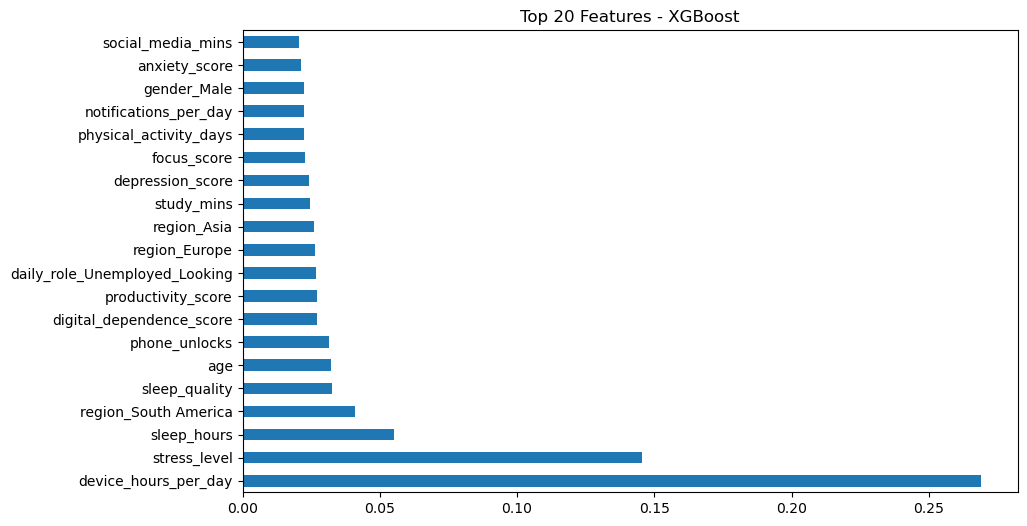

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

importance = xgb_grid.best_estimator_.feature_importances_
features = X_ready.columns

feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp.head(20).plot(kind='barh')
plt.title("Top 20 Features - XGBoost")
plt.show()


As we can observe in the results theres a big difference in the F1 score between the three models, and the best one analyzing the confussion matrix and the parameters is XGBoost

# 1.6.4 Support Vector Machine 

In [153]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# ================================
# Pipeline: Escalado + SVM
# ================================
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, class_weight='balanced', random_state=88888888))
])

# Hiperparámetros para GridSearch
svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# GridSearchCV
svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_params,
    scoring='f1',
    n_jobs=-1,
    cv=3
)

# Entrenamiento
svm_grid.fit(X_train, y_train)

print("SVM - Mejor F1 (train):", svm_grid.best_score_)
print("SVM - Mejores hiperparámetros:", svm_grid.best_params_)

# Predicción en test
y_svm_pred = svm_grid.predict(X_test)

print("SVM - Matriz de Confusión:")
print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))


SVM - Mejor F1 (train): 0.5050164883204112
SVM - Mejores hiperparámetros: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
SVM - Matriz de Confusión:
[[488  71]
 [ 59  82]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       559
           1       0.54      0.58      0.56       141

    accuracy                           0.81       700
   macro avg       0.71      0.73      0.72       700
weighted avg       0.82      0.81      0.82       700



# 1.7 Model Dvelopment with class weights 

### 1.7.1 Premodelling Data Description

In [154]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

print("\nDistribución de la variable objetivo (entrenamiento):")
print(y_train.value_counts(normalize=True))

print("\nDistribución de la variable objetivo (test):")
print(y_test.value_counts(normalize=True))


Tamaño de X_train: (2800, 35)
Tamaño de X_test: (700, 35)

Distribución de la variable objetivo (entrenamiento):
high_risk_flag
0    0.798571
1    0.201429
Name: proportion, dtype: float64

Distribución de la variable objetivo (test):
high_risk_flag
0    0.798571
1    0.201429
Name: proportion, dtype: float64


In [169]:
def model_performance_evaluation(y_true, y_pred):
    metrics = {
        'metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
        'value': [
            accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred, zero_division=0),
            recall_score(y_true, y_pred, zero_division=0),
            f1_score(y_true, y_pred, zero_division=0),
            roc_auc_score(y_true, y_pred)
        ]
    }
    return pd.DataFrame(metrics)

### 1.7.2 Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=88888888)
logreg.fit(X_train, y_train)

y_log_pred = logreg.predict(X_test)

print("Logistic Regression - Confussion Matrix")
print(confusion_matrix(y_test, y_log_pred))
print(classification_report(y_test, y_log_pred))


Logistic Regression - Confussion Matrix
[[418 141]
 [ 44  97]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       559
           1       0.41      0.69      0.51       141

    accuracy                           0.74       700
   macro avg       0.66      0.72      0.67       700
weighted avg       0.80      0.74      0.76       700



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
log_reg_w = LogisticRegression(class_weight='balanced', random_state=88888888, max_iter=500)
log_reg_w.fit(X_train, y_train)

# Train
y_hat_train = log_reg_w.predict(X_train)
log_reg_w_train = model_performance_evaluation(y_train, y_hat_train)
log_reg_w_train['model'] = ['weighted_log_reg'] * 5
log_reg_w_train['set'] = ['train'] * 5

# Test
y_hat_test = log_reg_w.predict(X_test)
log_reg_w_test = model_performance_evaluation(y_test, y_hat_test)
log_reg_w_test['model'] = ['weighted_log_reg'] * 5
log_reg_w_test['set'] = ['test'] * 5

print("Weighted Logistic Regression Performance:")
display(log_reg_w_train)
display(log_reg_w_test)



Weighted Logistic Regression Performance:


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,metric,value,model,set
0,Accuracy,0.718571,weighted_log_reg,train
1,Precision,0.377996,weighted_log_reg,train
2,Recall,0.615248,weighted_log_reg,train
3,F1 Score,0.468286,weighted_log_reg,train
4,ROC AUC,0.679941,weighted_log_reg,train


,metric,value,model,set
0,Accuracy,0.735714,weighted_log_reg,test
1,Precision,0.409836,weighted_log_reg,test
2,Recall,0.709220,weighted_log_reg,test
3,F1 Score,0.519481,weighted_log_reg,test
4,ROC AUC,0.725808,weighted_log_reg,test


### 1.7.3 Decision Tree with Class Weights

In [164]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=88888888,
    max_depth=5
)
dtc.fit(X_train, y_train)

y_dt_pred = dtc.predict(X_test)

print("Decision Tree - Matriz de Confusión:")
print(confusion_matrix(y_test, y_dt_pred))
print(classification_report(y_test, y_dt_pred))

tree_w = DecisionTreeClassifier(class_weight='balanced', random_state=88888888, max_depth=5)
tree_w.fit(X_train, y_train)

# Train
y_hat_train = tree_w.predict(X_train)
tree_w_train = model_performance_evaluation(y_train, y_hat_train)
tree_w_train['model'] = ['weighted_decision_tree'] * 5
tree_w_train['set'] = ['train'] * 5

# Test
y_hat_test = tree_w.predict(X_test)
tree_w_test = model_performance_evaluation(y_test, y_hat_test)
tree_w_test['model'] = ['weighted_decision_tree'] * 5
tree_w_test['set'] = ['test'] * 5

print("Weighted Decision Tree Performance:")
display(tree_w_train)
display(tree_w_test)



Decision Tree - Matriz de Confusión:
[[533  26]
 [ 66  75]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       559
           1       0.74      0.53      0.62       141

    accuracy                           0.87       700
   macro avg       0.82      0.74      0.77       700
weighted avg       0.86      0.87      0.86       700

Weighted Decision Tree Performance:


,metric_name,metric_value,model,set
0,Accuracy,0.876429,weighted_decision_tree,train
1,Precision,0.755869,weighted_decision_tree,train
2,Recall,0.570922,weighted_decision_tree,train
3,F1,0.650505,weighted_decision_tree,train
4,AUROC,0.762205,weighted_decision_tree,train


,metric_name,metric_value,model,set
0,Accuracy,0.868571,weighted_decision_tree,test
1,Precision,0.742574,weighted_decision_tree,test
2,Recall,0.531915,weighted_decision_tree,test
3,F1,0.619835,weighted_decision_tree,test
4,AUROC,0.742702,weighted_decision_tree,test


### 1.7.4 Random Forest

In [165]:

rfc = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=88888888,
    n_jobs=-1
)
rfc.fit(X_train, y_train)

y_rf_pred = rfc.predict(X_test)

print("Random Forest - Matriz de Confusión:")
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Random Forest - Matriz de Confusión:
[[550   9]
 [ 80  61]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       559
           1       0.87      0.43      0.58       141

    accuracy                           0.87       700
   macro avg       0.87      0.71      0.75       700
weighted avg       0.87      0.87      0.86       700



In [163]:
rf_w = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=88888888,
    max_depth=7
)
rf_w.fit(X_train, y_train)

# Train
y_hat_train = rf_w.predict(X_train)
rf_w_train = model_performance_evaluation(y_train, y_hat_train)
rf_w_train['model'] = ['weighted_random_forest'] * 5
rf_w_train['set'] = ['train'] * 5

# Test
y_hat_test = rf_w.predict(X_test)
rf_w_test = model_performance_evaluation(y_test, y_hat_test)
rf_w_test['model'] = ['weighted_random_forest'] * 5
rf_w_test['set'] = ['test'] * 5

print("Weighted Random Forest Performance:")
display(rf_w_train)
display(rf_w_test)


Weighted Random Forest Performance:


,metric_name,metric_value,model,set
0,Accuracy,0.896429,weighted_random_forest,train
1,Precision,0.842500,weighted_random_forest,train
2,Recall,0.597518,weighted_random_forest,train
3,F1,0.699170,weighted_random_forest,train
4,AUROC,0.784671,weighted_random_forest,train


,metric_name,metric_value,model,set
0,Accuracy,0.884286,weighted_random_forest,test
1,Precision,0.812500,weighted_random_forest,test
2,Recall,0.553191,weighted_random_forest,test
3,F1,0.658228,weighted_random_forest,test
4,AUROC,0.760496,weighted_random_forest,test


### Support Vector Machine with Class Weights 

In [167]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(class_weight='balanced', kernel='rbf', random_state=88888888))
])

svm_pipeline.fit(X_train, y_train)

y_svm_pred = svm_pipeline.predict(X_test)

print("SVM - Matriz de Confusión:")
print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))

SVM - Matriz de Confusión:
[[490  69]
 [ 57  84]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       559
           1       0.55      0.60      0.57       141

    accuracy                           0.82       700
   macro avg       0.72      0.74      0.73       700
weighted avg       0.83      0.82      0.82       700



In [168]:
svm_w = SVC(kernel='rbf', class_weight='balanced', random_state=88888888)
svm_w.fit(X_train, y_train)

# Train
y_hat_train = svm_w.predict(X_train)
svm_w_train = model_performance_evaluation(y_train, y_hat_train)
svm_w_train['model'] = ['weighted_svm'] * 5
svm_w_train['set'] = ['train'] * 5

# Test
y_hat_test = svm_w.predict(X_test)
svm_w_test = model_performance_evaluation(y_test, y_hat_test)
svm_w_test['model'] = ['weighted_svm'] * 5
svm_w_test['set'] = ['test'] * 5

print("Weighted SVM Performance:")
display(svm_w_train)
display(svm_w_test)

Weighted SVM Performance:


,metric_name,metric_value,model,set
0,Accuracy,0.743929,weighted_svm,train
1,Precision,0.391489,weighted_svm,train
2,Recall,0.489362,weighted_svm,train
3,F1,0.434988,weighted_svm,train
4,AUROC,0.648751,weighted_svm,train


,metric_name,metric_value,model,set
0,Accuracy,0.754286,weighted_svm,test
1,Precision,0.409357,weighted_svm,test
2,Recall,0.496454,weighted_svm,test
3,F1,0.448718,weighted_svm,test
4,AUROC,0.657887,weighted_svm,test


# 1.8 Model Development with SMOTE Upsampling

### 1.8.1 Data Preprocessing Model

In [172]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [173]:
smote = SMOTE(random_state=88888888)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_sm.shape)
print(y_train.value_counts())
print(pd.Series(y_train_sm).value_counts())

Original training set shape: (2800, 35)
Resampled training set shape: (4472, 35)
high_risk_flag
0    2236
1     564
Name: count, dtype: int64
high_risk_flag
0    2236
1    2236
Name: count, dtype: int64


In [174]:
def model_performance_evaluation(y_true, y_pred):
    metrics = {
        'metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
        'value': [
            accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred, zero_division=0),
            recall_score(y_true, y_pred, zero_division=0),
            f1_score(y_true, y_pred, zero_division=0),
            roc_auc_score(y_true, y_pred)
        ]
    }
    return pd.DataFrame(metrics)


### 1.8.2 Logistic Regression 

In [175]:
log_reg_sm = LogisticRegression(random_state=88888888, max_iter=500)
log_reg_sm.fit(X_train_sm, y_train_sm)

y_pred_train = log_reg_sm.predict(X_train_sm)
y_pred_test = log_reg_sm.predict(X_test)

print("🔹 Logistic Regression - SMOTE")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

log_reg_sm_train = model_performance_evaluation(y_train_sm, y_pred_train)
log_reg_sm_train['model'] = ['smote_log_reg'] * 5
log_reg_sm_train['set'] = ['train'] * 5

log_reg_sm_test = model_performance_evaluation(y_test, y_pred_test)
log_reg_sm_test['model'] = ['smote_log_reg'] * 5
log_reg_sm_test['set'] = ['test'] * 5

🔹 Logistic Regression - SMOTE
[[496  63]
 [ 84  57]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       559
           1       0.47      0.40      0.44       141

    accuracy                           0.79       700
   macro avg       0.67      0.65      0.65       700
weighted avg       0.78      0.79      0.78       700



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
display(log_reg_sm_train, log_reg_sm_test,)

,metric,value,model,set
0,Accuracy,0.836986,smote_log_reg,train
1,Precision,0.864186,smote_log_reg,train
2,Recall,0.799642,smote_log_reg,train
3,F1 Score,0.830662,smote_log_reg,train
4,ROC AUC,0.836986,smote_log_reg,train


,metric,value,model,set
0,Accuracy,0.790000,smote_log_reg,test
1,Precision,0.475000,smote_log_reg,test
2,Recall,0.404255,smote_log_reg,test
3,F1 Score,0.436782,smote_log_reg,test
4,ROC AUC,0.645777,smote_log_reg,test


### 1.8.3 Decision Tree

In [178]:
tree_sm = DecisionTreeClassifier(random_state=88888888, max_depth=5)
tree_sm.fit(X_train_sm, y_train_sm)

y_pred_train = tree_sm.predict(X_train_sm)
y_pred_test = tree_sm.predict(X_test)

print("\n🔹 Decision Tree - SMOTE")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

tree_sm_train = model_performance_evaluation(y_train_sm, y_pred_train)
tree_sm_train['model'] = ['smote_decision_tree'] * 5
tree_sm_train['set'] = ['train'] * 5

tree_sm_test = model_performance_evaluation(y_test, y_pred_test)
tree_sm_test['model'] = ['smote_decision_tree'] * 5
tree_sm_test['set'] = ['test'] * 5


🔹 Decision Tree - SMOTE
[[532  27]
 [ 81  60]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       559
           1       0.69      0.43      0.53       141

    accuracy                           0.85       700
   macro avg       0.78      0.69      0.72       700
weighted avg       0.83      0.85      0.83       700



In [186]:
display(tree_sm_train, tree_sm_test)

,metric,value,model,set
0,Accuracy,0.792263,smote_decision_tree,train
1,Precision,0.949141,smote_decision_tree,train
2,Recall,0.617621,smote_decision_tree,train
3,F1 Score,0.748307,smote_decision_tree,train
4,ROC AUC,0.792263,smote_decision_tree,train


,metric,value,model,set
0,Accuracy,0.845714,smote_decision_tree,test
1,Precision,0.689655,smote_decision_tree,test
2,Recall,0.425532,smote_decision_tree,test
3,F1 Score,0.526316,smote_decision_tree,test
4,ROC AUC,0.688616,smote_decision_tree,test


### 1.8.4 Ranfom Forest 

In [180]:
rf_sm = RandomForestClassifier(random_state=88888888, n_estimators=200, max_depth=7)
rf_sm.fit(X_train_sm, y_train_sm)

y_pred_train = rf_sm.predict(X_train_sm)
y_pred_test = rf_sm.predict(X_test)

print("\n🔹 Random Forest - SMOTE")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

rf_sm_train = model_performance_evaluation(y_train_sm, y_pred_train)
rf_sm_train['model'] = ['smote_random_forest'] * 5
rf_sm_train['set'] = ['train'] * 5

rf_sm_test = model_performance_evaluation(y_test, y_pred_test)
rf_sm_test['model'] = ['smote_random_forest'] * 5
rf_sm_test['set'] = ['test'] * 5


🔹 Random Forest - SMOTE
[[531  28]
 [ 63  78]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       559
           1       0.74      0.55      0.63       141

    accuracy                           0.87       700
   macro avg       0.81      0.75      0.78       700
weighted avg       0.86      0.87      0.86       700



In [187]:
display(rf_sm_train, rf_sm_test)

,metric,value,model,set
0,Accuracy,0.900492,smote_random_forest,train
1,Precision,0.962791,smote_random_forest,train
2,Recall,0.833184,smote_random_forest,train
3,F1 Score,0.893311,smote_random_forest,train
4,ROC AUC,0.900492,smote_random_forest,train


,metric,value,model,set
0,Accuracy,0.870000,smote_random_forest,test
1,Precision,0.735849,smote_random_forest,test
2,Recall,0.553191,smote_random_forest,test
3,F1 Score,0.631579,smote_random_forest,test
4,ROC AUC,0.751551,smote_random_forest,test


### 1.8.5 Support Vector Machine 

In [182]:
svm_sm = SVC(kernel='rbf', probability=False, random_state=88888888)
svm_sm.fit(X_train_sm, y_train_sm)

y_pred_train = svm_sm.predict(X_train_sm)
y_pred_test = svm_sm.predict(X_test)

print("\n🔹 SVM - SMOTE")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

svm_sm_train = model_performance_evaluation(y_train_sm, y_pred_train)
svm_sm_train['model'] = ['smote_svm'] * 5
svm_sm_train['set'] = ['train'] * 5

svm_sm_test = model_performance_evaluation(y_test, y_pred_test)
svm_sm_test['model'] = ['smote_svm'] * 5
svm_sm_test['set'] = ['test'] * 5


🔹 SVM - SMOTE
[[442 117]
 [ 66  75]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       559
           1       0.39      0.53      0.45       141

    accuracy                           0.74       700
   macro avg       0.63      0.66      0.64       700
weighted avg       0.77      0.74      0.75       700



In [189]:
display(svm_sm_train, svm_sm_test)

,metric,value,model,set
0,Accuracy,0.660555,smote_svm,train
1,Precision,0.717576,smote_svm,train
2,Recall,0.529517,smote_svm,train
3,F1 Score,0.609367,smote_svm,train
4,ROC AUC,0.660555,smote_svm,train


,metric,value,model,set
0,Accuracy,0.738571,smote_svm,test
1,Precision,0.390625,smote_svm,test
2,Recall,0.531915,smote_svm,test
3,F1 Score,0.450450,smote_svm,test
4,ROC AUC,0.661306,smote_svm,test


### 1.9 Model Development With CNN Downsampling 

In [193]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

cnn = ClusterCentroids(random_state=42)
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train, y_train)

print('After CNN Downsampling:')
print(y_train_cnn.value_counts())

After CNN Downsampling:
high_risk_flag
0    564
1    564
Name: count, dtype: int64


In [194]:
def model_performance_evaluation(y_true, y_pred):
    metrics = {
        'metric': ['accuracy', 'precision', 'recall', 'f1_score', 'support'],
        'value': [
            accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred),
            recall_score(y_true, y_pred),
            f1_score(y_true, y_pred),
            len(y_true)
        ]
    }
    return pd.DataFrame(metrics)

### 1.9.2 Logistic Regression 

In [198]:
lr_cnn = LogisticRegression(max_iter=1000, random_state=42)
lr_cnn.fit(X_train_cnn, y_train_cnn)

y_train_pred_lr = lr_cnn.predict(X_train_cnn)
y_test_pred_lr = lr_cnn.predict(X_test)

lr_train_perf = model_performance_evaluation(y_train_cnn, y_train_pred_lr)
lr_train_perf['model'] = ['lr_cnn'] * 5
lr_train_perf['set'] = ['train'] * 5

lr_test_perf = model_performance_evaluation(y_test, y_test_pred_lr)
lr_test_perf['model'] = ['lr_cnn'] * 5
lr_test_perf['set'] = ['test'] * 5

print("\nLogistic Regression CNN - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
display(lr_train_perf)
display(lr_test_perf)


Logistic Regression CNN - Confusion Matrix:
[[442 117]
 [ 66  75]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       559
           1       0.39      0.53      0.45       141

    accuracy                           0.74       700
   macro avg       0.63      0.66      0.64       700
weighted avg       0.77      0.74      0.75       700



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,metric,value,model,set
0,accuracy,0.905142,lr_cnn,train
1,precision,0.881469,lr_cnn,train
2,recall,0.936170,lr_cnn,train
3,f1_score,0.907997,lr_cnn,train
4,support,1128.000000,lr_cnn,train


,metric,value,model,set
0,accuracy,0.295714,lr_cnn,test
1,precision,0.216129,lr_cnn,test
2,recall,0.950355,lr_cnn,test
3,f1_score,0.352168,lr_cnn,test
4,support,700.000000,lr_cnn,test


### 1.9.3 Decision Tree

In [205]:
dt_cnn = DecisionTreeClassifier(random_state=42)
dt_cnn.fit(X_train_cnn, y_train_cnn)

y_train_pred_dt = dt_cnn.predict(X_train_cnn)
y_test_pred_dt = dt_cnn.predict(X_test)

dt_train_perf = model_performance_evaluation(y_train_cnn, y_train_pred_dt)
dt_train_perf['model'] = ['dt_cnn'] * 5
dt_train_perf['set'] = ['train'] * 5

dt_test_perf = model_performance_evaluation(y_test, y_test_pred_dt)
dt_test_perf['model'] = ['dt_cnn'] * 5
dt_test_perf['set'] = ['test'] * 5

print("\nDecision Tree CNN - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))
print(classification_report(y_test, y_test_pred_dt))
display(dt_train_perf)
display(dt_test_perf)



Decision Tree CNN - Confusion Matrix:
[[169 390]
 [ 34 107]]
              precision    recall  f1-score   support

           0       0.83      0.30      0.44       559
           1       0.22      0.76      0.34       141

    accuracy                           0.39       700
   macro avg       0.52      0.53      0.39       700
weighted avg       0.71      0.39      0.42       700



,metric,value,model,set
0,accuracy,1.0,dt_cnn,train
1,precision,1.0,dt_cnn,train
2,recall,1.0,dt_cnn,train
3,f1_score,1.0,dt_cnn,train
4,support,1128.0,dt_cnn,train


,metric,value,model,set
0,accuracy,0.394286,dt_cnn,test
1,precision,0.215292,dt_cnn,test
2,recall,0.758865,dt_cnn,test
3,f1_score,0.335423,dt_cnn,test
4,support,700.000000,dt_cnn,test


### 1.9.4 Random Forest 

In [210]:
rf_cnn = RandomForestClassifier(random_state=42)
rf_cnn.fit(X_train_cnn, y_train_cnn)

y_train_pred_rf = rf_cnn.predict(X_train_cnn)
y_test_pred_rf = rf_cnn.predict(X_test)

rf_train_perf = model_performance_evaluation(y_train_cnn, y_train_pred_rf)
rf_train_perf['model'] = ['rf_cnn'] * 5
rf_train_perf['set'] = ['train'] * 5

rf_test_perf = model_performance_evaluation(y_test, y_test_pred_rf)
rf_test_perf['model'] = ['rf_cnn'] * 5
rf_test_perf['set'] = ['test'] * 5

print("\nRandom Forest CNN - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))
display(rf_train_perf)
display(rf_test_perf)


Random Forest CNN - Confusion Matrix:
[[ 45 514]
 [  3 138]]
              precision    recall  f1-score   support

           0       0.94      0.08      0.15       559
           1       0.21      0.98      0.35       141

    accuracy                           0.26       700
   macro avg       0.57      0.53      0.25       700
weighted avg       0.79      0.26      0.19       700



,metric,value,model,set
0,accuracy,1.0,rf_cnn,train
1,precision,1.0,rf_cnn,train
2,recall,1.0,rf_cnn,train
3,f1_score,1.0,rf_cnn,train
4,support,1128.0,rf_cnn,train


,metric,value,model,set
0,accuracy,0.261429,rf_cnn,test
1,precision,0.211656,rf_cnn,test
2,recall,0.978723,rf_cnn,test
3,f1_score,0.348045,rf_cnn,test
4,support,700.000000,rf_cnn,test


### 1.9.5 Support Vector Machine 

In [211]:
svm_cnn = SVC(kernel='linear', probability=True, random_state=42)
svm_cnn.fit(X_train_cnn, y_train_cnn)

y_train_pred_svm = svm_cnn.predict(X_train_cnn)
y_test_pred_svm = svm_cnn.predict(X_test)

svm_train_perf = model_performance_evaluation(y_train_cnn, y_train_pred_svm)
svm_train_perf['model'] = ['svm_cnn'] * 5
svm_train_perf['set'] = ['train'] * 5

svm_test_perf = model_performance_evaluation(y_test, y_test_pred_svm)
svm_test_perf['model'] = ['svm_cnn'] * 5
svm_test_perf['set'] = ['test'] * 5

print("\nSVM CNN - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))
display(svm_train_perf)
display(svm_test_perf)


SVM CNN - Confusion Matrix:
[[ 35 524]
 [  4 137]]
              precision    recall  f1-score   support

           0       0.90      0.06      0.12       559
           1       0.21      0.97      0.34       141

    accuracy                           0.25       700
   macro avg       0.55      0.52      0.23       700
weighted avg       0.76      0.25      0.16       700



,metric,value,model,set
0,accuracy,0.914894,svm_cnn,train
1,precision,0.875000,svm_cnn,train
2,recall,0.968085,svm_cnn,train
3,f1_score,0.919192,svm_cnn,train
4,support,1128.000000,svm_cnn,train


,metric,value,model,set
0,accuracy,0.245714,svm_cnn,test
1,precision,0.207262,svm_cnn,test
2,recall,0.971631,svm_cnn,test
3,f1_score,0.341646,svm_cnn,test
4,support,700.000000,svm_cnn,test


# 1.10 Model Comparison Summary